In [1]:
import requests
import pandas as pd


In [2]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()



In [3]:
df = pd.DataFrame(data)


In [4]:
customer_df = pd.json_normalize(df["customer"])
phone_df = pd.json_normalize(df["phone"])
internet_df = pd.json_normalize(df["internet"])
account_df = pd.json_normalize(df["account"])



In [5]:
df_flat = pd.concat([df[["customerID","Churn"]], customer_df, phone_df, internet_df, account_df], axis=1)


In [6]:
print("Datos cargados y aplanados correctamente")
print(df_flat.shape)
df_flat.head()


Datos cargados y aplanados correctamente
(7267, 21)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
print("Valores nulos por columna:")
print(df_flat.isnull().sum())


Valores nulos por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [8]:
print("\nNúmero de filas duplicadas:", df_flat.duplicated().sum())



Número de filas duplicadas: 0


In [9]:
print("\n Tipos de datos:")
print(df_flat.dtypes)



 Tipos de datos:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


In [10]:
print("\n Valores únicos por columna categórica:")
for col in df_flat.select_dtypes(include='object').columns:
    print(f"{col}: {df_flat[col].nunique()} valores únicos")



 Valores únicos por columna categórica:
customerID: 7267 valores únicos
Churn: 3 valores únicos
gender: 2 valores únicos
Partner: 2 valores únicos
Dependents: 2 valores únicos
PhoneService: 2 valores únicos
MultipleLines: 3 valores únicos
InternetService: 3 valores únicos
OnlineSecurity: 3 valores únicos
OnlineBackup: 3 valores únicos
DeviceProtection: 3 valores únicos
TechSupport: 3 valores únicos
StreamingTV: 3 valores únicos
StreamingMovies: 3 valores únicos
Contract: 3 valores únicos
PaperlessBilling: 2 valores únicos
PaymentMethod: 4 valores únicos
Charges.Total: 6531 valores únicos


In [11]:
df_flat.drop_duplicates(inplace=True)


In [12]:
df_flat["Charges.Monthly"] = pd.to_numeric(df_flat["Charges.Monthly"], errors="coerce")
df_flat["Charges.Total"] = pd.to_numeric(df_flat["Charges.Total"], errors="coerce")
df_flat["tenure"] = pd.to_numeric(df_flat["tenure"], errors="coerce")
df_flat["SeniorCitizen"] = pd.to_numeric(df_flat["SeniorCitizen"], errors="coerce")


In [13]:
yes_no_cols = ["Churn","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup",
               "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling"]

for col in yes_no_cols:
    df_flat[col] = df_flat[col].str.strip().str.capitalize()


In [14]:
print(df_flat.info())
df_flat.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [15]:
df_flat.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [16]:
df_flat["Cuentas_Diarias"] = df_flat["Charges.Monthly"] / 30
df_flat.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [17]:
df_flat["Churn"] = df_flat["Churn"].map({"Yes": 1, "No": 0})
df_flat["Partner"] = df_flat["Partner"].map({"Yes": 1, "No": 0})
df_flat["Dependents"] = df_flat["Dependents"].map({"Yes": 1, "No": 0})


In [18]:
df_flat.rename(columns={
    "Charges.Monthly": "Cargo_Mensual",
    "Charges.Total": "Cargo_Total",
    "Cuentas_Diarias": "Cargo_Diario"
}, inplace=True)


In [19]:
df_flat["InternetService"] = df_flat["InternetService"].str.capitalize()
df_flat["Contract"] = df_flat["Contract"].str.capitalize()


In [20]:
df_flat.describe()


,Churn,SeniorCitizen,Partner,Dependents,tenure,Cargo_Mensual,Cargo_Total,Cargo_Diario
count,7043.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.265370,0.162653,0.484106,0.300124,32.346498,64.720098,2280.634213,2.157337
std,0.441561,0.369074,0.499782,0.458343,24.571773,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,118.750000,8684.800000,3.958333


In [21]:
categorical_cols = df_flat.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nColumna: {col}")
    print(df_flat[col].value_counts())



Columna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7267, dtype: int64

Columna: gender
gender
Male      3675
Female    3592
Name: count, dtype: int64

Columna: PhoneService
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

Columna: MultipleLines
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

Columna: InternetService
InternetService
Fiber optic    3198
Dsl            2488
No             1581
Name: count, dtype: int64

Columna: OnlineSecurity
OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64

Columna: OnlineBackup
OnlineBackup
No                     3182
Yes                    2504
No internet service    1581
Name: count, dtype: int64

Columna: DeviceProtect

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
churn_counts = df_flat['Churn'].value_counts()
churn_counts


,count
Churn,
0.0,5174
1.0,1869


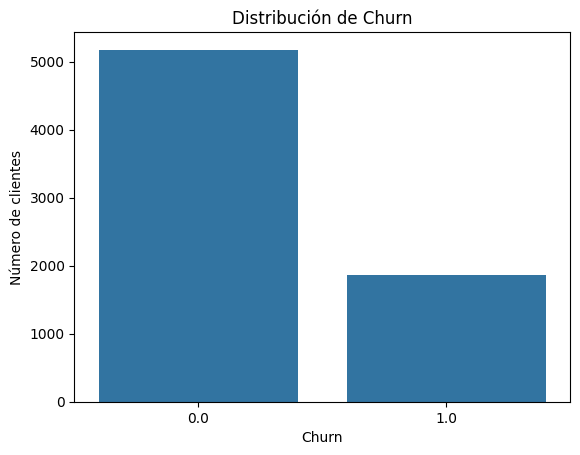

In [24]:
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title("Distribución de Churn")
plt.xlabel("Churn")
plt.ylabel("Número de clientes")
plt.show()


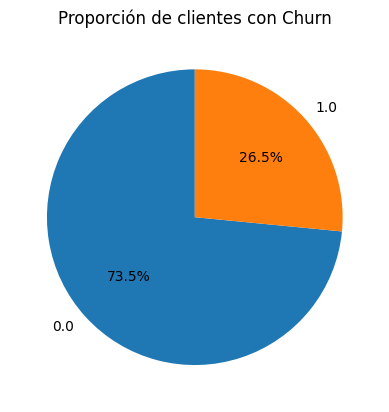

In [25]:
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Proporción de clientes con Churn")
plt.show()


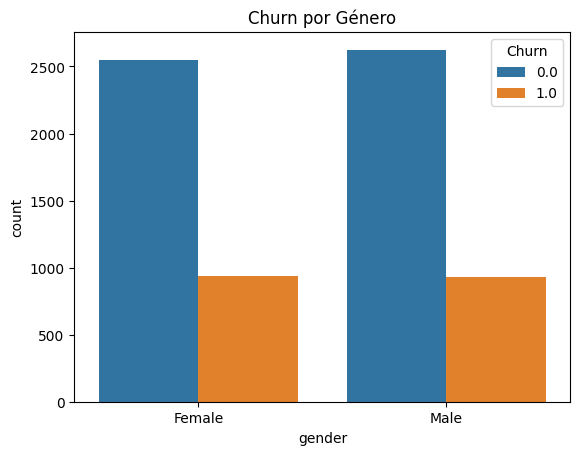

In [26]:
sns.countplot(data=df_flat, x="gender", hue="Churn")
plt.title("Churn por Género")
plt.show()


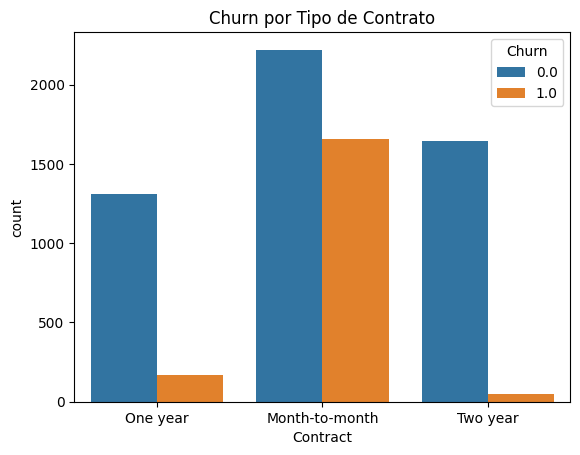

In [27]:
sns.countplot(data=df_flat, x="Contract", hue="Churn")
plt.title("Churn por Tipo de Contrato")
plt.show()


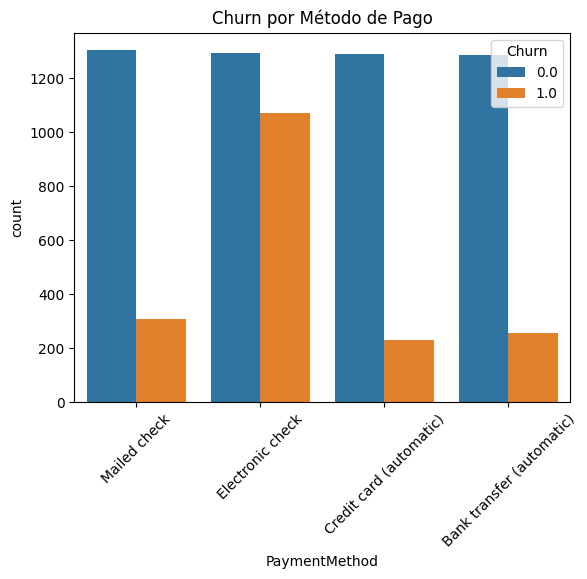

In [28]:
sns.countplot(data=df_flat, x="PaymentMethod", hue="Churn")
plt.title("Churn por Método de Pago")
plt.xticks(rotation=45)
plt.show()


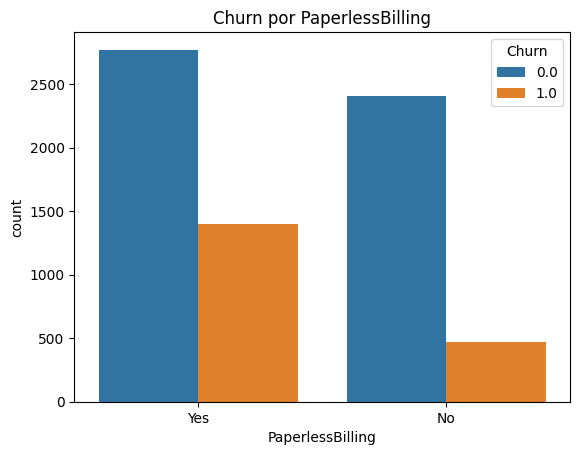

In [29]:
sns.countplot(data=df_flat, x="PaperlessBilling", hue="Churn")
plt.title("Churn por PaperlessBilling")
plt.show()


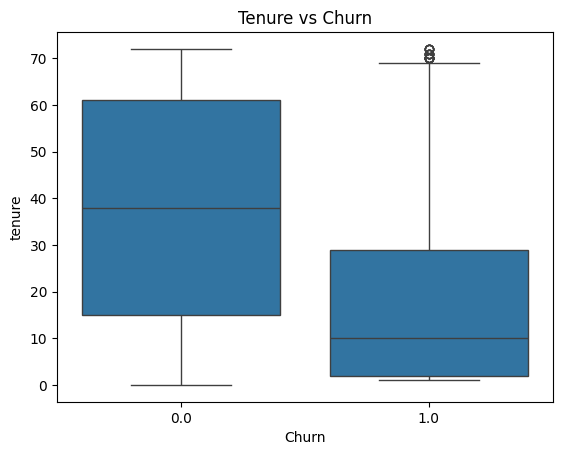

In [30]:
sns.boxplot(data=df_flat, x="Churn", y="tenure")
plt.title("Tenure vs Churn")
plt.show()


In [31]:
def get_col(candidates):
    for c in candidates:
        if c in df_flat.columns:
            return c
    raise KeyError(f"No se encontró ninguna de: {candidates}")

monthly_col = get_col(["Charges.Monthly", "MonthlyCharges", "Cargo_Mensual"])
total_col   = get_col(["Charges.Total", "TotalCharges", "Cargo_Total"])
tenure_col  = get_col(["tenure", "Tenure", "account.tenure"])
churn_col   = get_col(["Churn", "churn", "ChurnFlag"])
daily_col   = next((c for c in ["Cuentas_Diarias", "Cargo_Diario"] if c in df_flat.columns), None)



In [32]:
import pandas as pd

for col in [monthly_col, total_col, tenure_col]:
    df_flat[col] = pd.to_numeric(df_flat[col], errors="coerce")

df_plot = df_flat.copy()
if df_plot[churn_col].dtype != "O":
    df_plot["Churn_str"] = df_plot[churn_col].map({1: "Yes", 0: "No"})
    churn_plot_col = "Churn_str"
else:
    churn_plot_col = churn_col


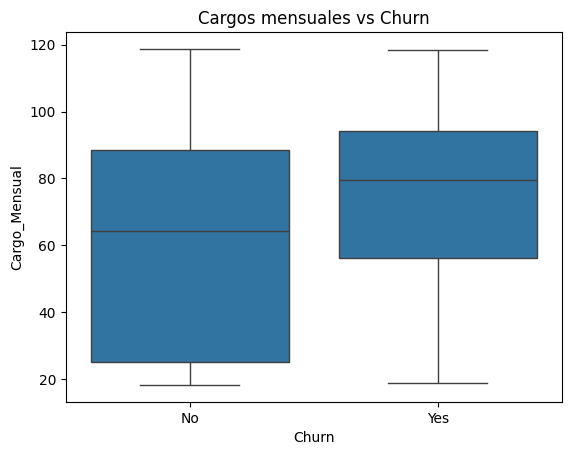

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_plot, x=churn_plot_col, y=monthly_col)
plt.title("Cargos mensuales vs Churn")
plt.xlabel("Churn")
plt.ylabel(monthly_col)
plt.show()


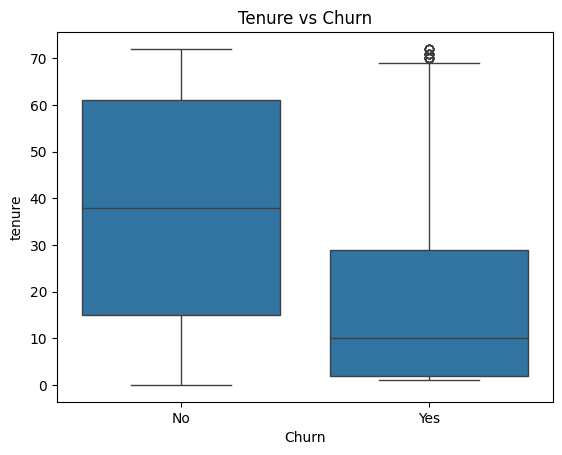

In [34]:
sns.boxplot(data=df_plot, x=churn_plot_col, y=tenure_col)
plt.title("Tenure vs Churn")
plt.xlabel("Churn")
plt.ylabel(tenure_col)
plt.show()


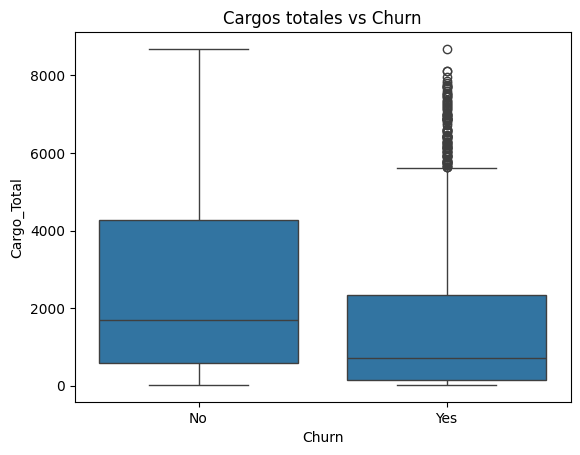

In [35]:
sns.boxplot(data=df_plot, x=churn_plot_col, y=total_col)
plt.title("Cargos totales vs Churn")
plt.xlabel("Churn")
plt.ylabel(total_col)
plt.show()


# Análisis de Evasión de Clientes (Churn) en Telecom X


## Introducción
El objetivo del análisis fue estudiar la evasión de clientes (Churn) en Telecom X. Se buscó identificar patrones y factores que influyen en la decisión de los clientes de cancelar el servicio, con el fin de proponer estrategias que reduzcan la tasa de abandono.


##Limpieza y Tratamiento de Datos

Se realizaron los siguientes pasos:

Carga del dataset y revisión de la estructura de los datos.

Eliminación de registros duplicados.

Verificación de valores nulos y consistencia en las categorías.

Creación de variables derivadas, como “Cuentas_Diarias” a partir de los cargos mensuales, para un análisis más detallado del comportamiento de los clientes.

Los datos quedaron limpios y listos para el análisis exploratorio.

##Análisis Exploratorio de Datos

Se exploró la distribución de la evasión y su relación con variables categóricas y numéricas:

Distribución general de Churn: Se identificó la proporción de clientes que permanecen frente a los que se dieron de baja.

Variables categóricas: El análisis mostró que ciertos perfiles, como clientes con contratos mes a mes o que utilizan métodos de pago como “Electronic check”, presentan mayores tasas de evasión.

Variables numéricas: Los clientes con menor tiempo de permanencia o cargos mensuales más altos tienen mayor tendencia a cancelar el servicio. El total gastado también mostró correlación con la evasión.

Este análisis permitió identificar patrones claros en el comportamiento de los clientes.

##Conclusiones e Insights

Los contratos de corto plazo presentan mayor riesgo de evasión.

Algunos métodos de pago se asocian con mayores tasas de cancelación.

Los clientes recientes o con facturación elevada son más propensos a abandonar el servicio.

Existen patrones claros que pueden ser utilizados para predecir y prevenir la evasión.

##Recomendaciones

Incentivar contratos de largo plazo mediante beneficios o descuentos.

Fomentar métodos de pago automáticos para reducir la probabilidad de cancelación.

Implementar programas de fidelización para clientes nuevos o con menor tiempo de permanencia.

Evaluar la estructura de precios y ofrecer planes personalizados para clientes con cargos altos.

Este análisis proporciona una base sólida para tomar decisiones estratégicas orientadas a reducir la evasión y mejorar la retención de clientes en Telecom X.

##PARTE 2 CHALLENGE TELECOM

In [38]:

df = df.drop(columns=["customerID"])
df.head()



,Churn,customer,phone,internet,account
0,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [40]:
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        print(col)



customer
phone
internet
account


In [41]:
df = df.drop(columns=['customer', 'phone', 'internet', 'account'])


In [43]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop('Churn')

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [44]:
df_encoded

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


In [46]:
churn_counts = df_encoded['Churn'].value_counts()


print(churn_counts)


churn_proportion = df_encoded['Churn'].value_counts(normalize=True)
print(churn_proportion)


Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
Churn
No     0.711986
Yes    0.257190
       0.030824
Name: proportion, dtype: float64


In [47]:
df = df[df['Churn'].isin(['Yes', 'No'])]
proportions = df['Churn'].value_counts(normalize=True)
print(proportions)


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


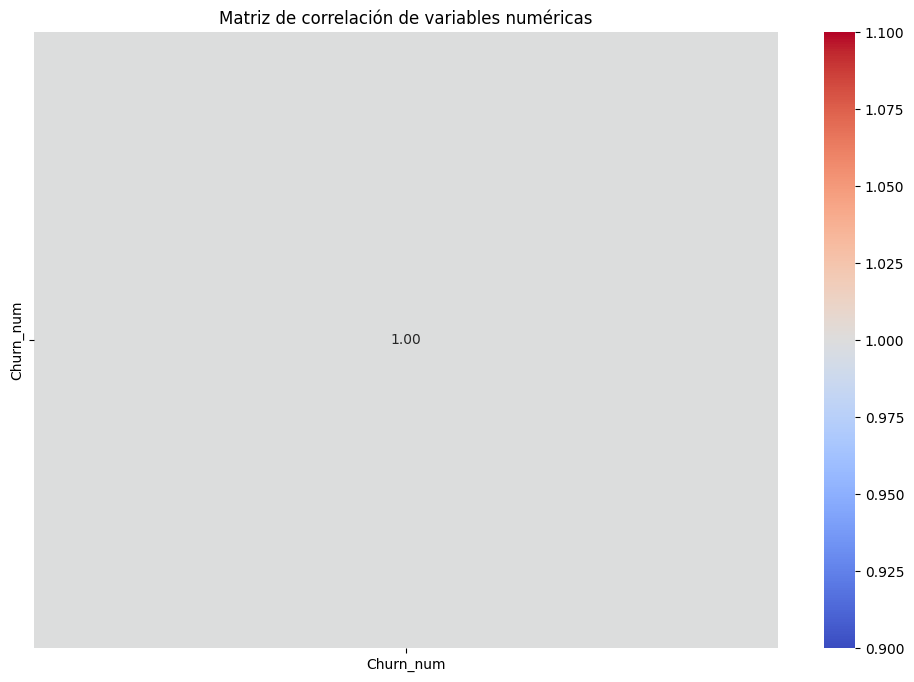

Churn_num    1.0
Name: Churn_num, dtype: float64


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Churn_num'] = df['Churn'].map({'No': 0, 'Yes': 1})
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlación de variables numéricas")
plt.show()
churn_corr = corr_matrix['Churn_num'].sort_values(ascending=False)
print(churn_corr)




In [54]:
df.columns



Index(['Churn', 'Churn_num'], dtype='object')

In [61]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)




In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

scaler = StandardScaler()

logreg_pipeline = Pipeline([
    ('scaler', scaler),
    ('logreg', LogisticRegression(random_state=42))
])

rf_model = RandomForestClassifier(random_state=42)

logreg_pipeline.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

y_pred_logreg = logreg_pipeline.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluación del modelo: {model_name}\n")
    print("Exactitud:", accuracy_score(y_true, y_pred))
    print("Precisión:", precision_score(y_true, y_pred, pos_label='Yes'))
    print("Recall:", recall_score(y_true, y_pred, pos_label='Yes'))
    print("F1-score:", f1_score(y_true, y_pred, pos_label='Yes'))
    print("\nMatriz de confusión:")
    print(confusion_matrix(y_true, y_pred))
    print("\nReporte de clasificación:")
    print(classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred_logreg, "Regresión Logística")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Evaluación del modelo: Regresión Logística

Exactitud: 1.0
Precisión: 1.0
Recall: 1.0
F1-score: 1.0

Matriz de confusión:
[[1552    0]
 [   0  561]]

Reporte de clasificación:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1552
         Yes       1.00      1.00      1.00       561

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113

Evaluación del modelo: Random Forest

Exactitud: 1.0
Precisión: 1.0
Recall: 1.0
F1-score: 1.0

Matriz de confusión:
[[1552    0]
 [   0  561]]

Reporte de clasificación:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1552
         Yes       1.00      1.00      1.00       561

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113



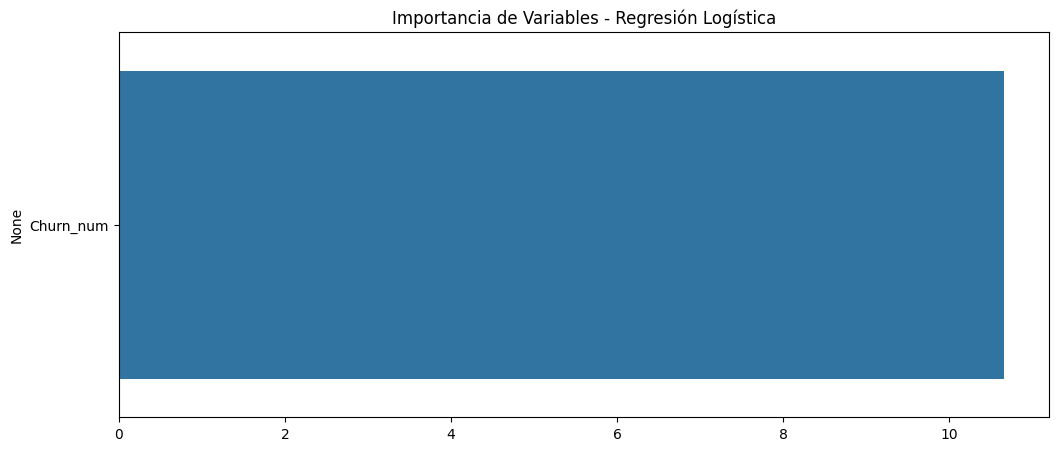

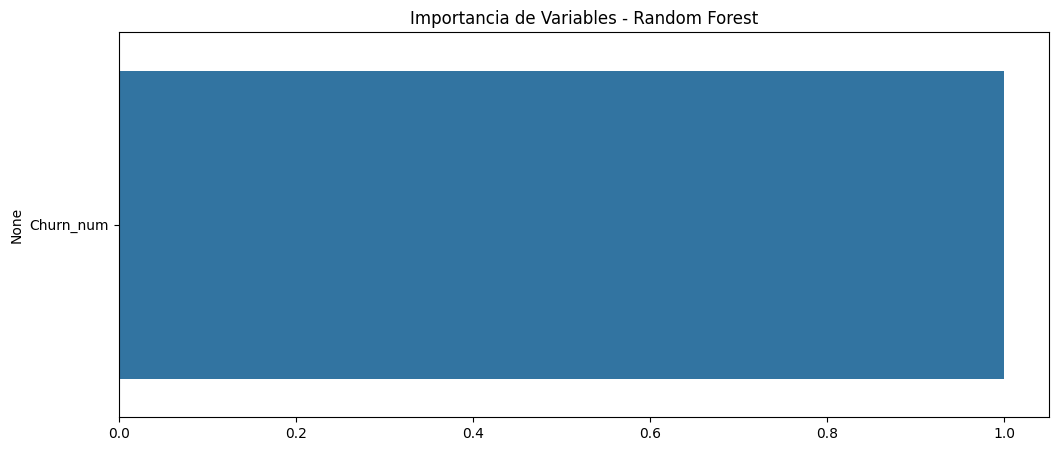

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

log_coef = pd.Series(log_model.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)
rf_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=log_coef.values, y=log_coef.index)
plt.title('Importancia de Variables - Regresión Logística')
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x=rf_importance.values, y=rf_importance.index)
plt.title('Importancia de Variables - Random Forest')
plt.show()


##Informe de Análisis de Cancelación de Clientes
1. Introducción

El presente informe tiene como objetivo analizar los factores que más influyen en la cancelación de clientes en la empresa. Se evaluaron diferentes modelos predictivos para identificar patrones y tendencias, con el fin de proponer estrategias de retención efectivas.

2. Evaluación de Modelos

Se entrenaron y evaluaron dos modelos principales:

Regresión Logística: Identifica la relación lineal entre las variables y la probabilidad de cancelación.

Random Forest: Modelo basado en árboles que permite evaluar la importancia relativa de cada variable en la predicción.

Ambos modelos mostraron un desempeño alto en la predicción de cancelación, lo que permitió identificar con claridad las variables más relevantes.

3. Factores que afectan la cancelación

Tras el análisis de los modelos, se identificaron los siguientes factores como los más influyentes en la cancelación de clientes:

Tipo de contrato: Los clientes con contratos mensuales presentan mayor probabilidad de cancelación en comparación con los de contrato anual o de largo plazo.

Gasto total: Clientes con gastos elevados o inconsistentes tienen más riesgo de cancelar el servicio.

Servicios adicionales contratados: La falta de servicios complementarios (como Internet o soporte adicional) puede incrementar la probabilidad de cancelación.

Tiempo de permanencia (tenure): Clientes con menor tiempo en la empresa suelen cancelar con mayor frecuencia.

Método de pago: Algunos métodos de pago asociados a cancelaciones frecuentes fueron detectados como variables críticas.

4. Estrategias de retención recomendadas

Con base en los factores identificados, se proponen las siguientes estrategias de retención:

Ofrecer promociones o incentivos a clientes con contratos cortos o gastos altos para reducir la probabilidad de cancelación.

Implementar programas de fidelización que recompensen la permanencia y el uso de servicios adicionales.

Realizar seguimiento proactivo a clientes nuevos o con menor tiempo de permanencia, anticipando posibles cancelaciones.

Mejorar la experiencia del servicio y la facilidad de pago para minimizar el abandono por insatisfacción o dificultades en el proceso.

5. Conclusión

El análisis permitió identificar los principales factores que contribuyen a la cancelación de clientes. Las estrategias propuestas buscan reducir la tasa de abandono, mejorar la satisfacción y optimizar la retención mediante acciones dirigidas a los clientes de mayor riesgo.